In [25]:
!pip install mglearn

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt

In [27]:
X, Y = mglearn.datasets.make_forge()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
Y.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26,)

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [33]:
print(f"train accuracy: {knn.score(X_train, Y_train)}")
print(f"test accuracy: {knn.score(X_test, Y_test)}")
prediction = knn.predict(X)
print(prediction)
print(Y)

train accuracy: 1.0
test accuracy: 0.8571428571428571
[1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


train accuracy: 1.0
test accuracy: 0.8571428571428571
train accuracy: 1.0
test accuracy: 0.8571428571428571
train accuracy: 1.0
test accuracy: 0.8571428571428571
train accuracy: 1.0
test accuracy: 0.8571428571428571


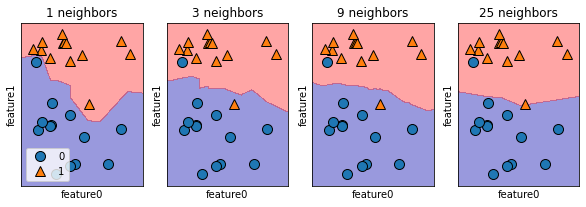

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for k, ax in zip([1, 3, 9, 25], axes):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X, Y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y, ax=ax)
    ax.set_title(f"{k} neighbors")
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")
axes[0].legend(loc=3)

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
cv = KFold(n_splits=3, shuffle=True, random_state=42)
params = {
    "n_neighbors":list(range(1, 10, 1))
}

gridcv = GridSearchCV(knn, param_grid=params, scoring="accuracy", n_jobs=-1, cv=cv)
gridcv.fit(X_train, Y_train)
best_params = gridcv.best_params_
best_score = gridcv.best_score_
print(f'best parameter {best_params}\nscore {best_score}')
knn_optimized = KNeighborsClassifier(**best_params)
knn_optimized.fit(X_train, Y_train)
print(f"train accuracy: {knn_optimized.score(X_train, Y_train)}")
print(f"test accuracy: {knn_optimized.score(X_test, Y_test)}")

best parameter {'n_neighbors': 3}
score 0.9444444444444445
train accuracy: 0.9473684210526315
test accuracy: 0.8571428571428571
